# Information

Mit diesem Notebook lassen sich Messwerte simulieren.

Diese simulierten Messwerte können in eine `csv`-Datei geschrieben werden und dann mit Hilfe der linearen Regression untersucht werden. Das Programm zur Simulation von Messwerten ist in der Datei

`messwerte.py` 

unter dem Namen `rand_lin_messwerte()` zu finden. Der Standardaufruf lautet

`lx, ly = mw.rand_lin_messwerte(n, x_0, x_1, a, b, epsilon=0.05)`

Dabei ist `n` die Zahl der Messwerte und `x_0` und `x_1` legen das Messintervall fest. Die Parameter $a$ und $b$ sind die Koeffizienten der linearen Funktion $y=a\,x+b$ und `epsilon` ist der relative Fehler bezogen auf den maximalen Messwert. Der Defaultwert für diesen Messfehler ist 5%.



## Aufgabe

Wählen Sie geeignete Werte für die Aufrufparameter von `mw.rand_lin_messwerte()` und schreiben Sie die generierten Daten in eine `csv`-Datei. Diese soll den Namen

`Messdaten_Notebook_6.csv`

haben.

Erstellen Sie anschließend ein Notebook `Notebook_7.ipynb`, in dem Sie aus den von Ihnen generierten Daten die Regressionsgrade ermitteln. Stellen Sie die Regressionsgrade in einem Diagramm dar und beurteilen Sie die Qualität der Regression.

In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd

import messwerte as mw
from fun_expr import Function_from_Expression as FE

**Hinweis:** Die Aufrufparameter der Funktion `mw.rand_lin_messwerte()` sind:

- n: Anzahl der Messpunkte
- x_0, x_1: Das Intervall $x_0 \le x \le x_1$


- a: Die Steigung der Funktion, die simuliert werden soll
- b: Der Achsenabschnitt der Funktion, die simuliert werden soll


- epsilon: Der Messfeher der Daten, die simuliert werden

In [2]:
# Definiere den relativen Fehler der Simulation
epsilon=20.0e-2 # 20.0%

# Lege das Intervall x_0 <= x <= x_1 fest
x_0 = 0
x_1 = 10

# Lege die Koeffizienten a und b fest
a_0 = 0.5
b_0 = 2

# Lege den Dateinamen fest, in den die Daten geschrieben werden sollen
pfad = 'Messdaten_Notebook_6.csv'

In [3]:
lx, ly = mw.rand_lin_messwerte(
    n=11,
    x_0 = x_0,
    x_1 = x_1,
    a = a_0,
    b = b_0,
    epsilon = epsilon
)

df = pd.DataFrame(
    {
        'x': lx,
        'y': ly
    }
)

df

,x,y
0,0.0,1.953156
1,1.0,2.243226
2,2.0,3.562050
3,3.0,3.398662
4,4.0,3.664224
5,5.0,4.473993
6,6.0,5.078122
7,7.0,4.823491
8,8.0,6.120876
9,9.0,7.029518


Plot des Datensatzes:

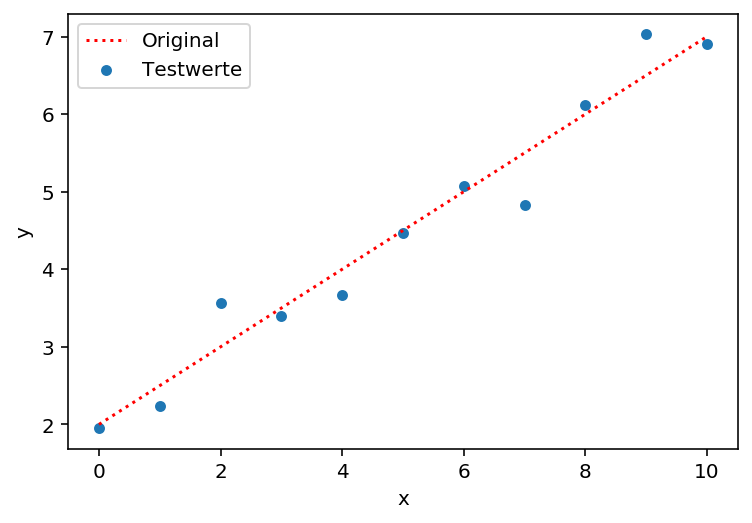

In [4]:
ax = df.plot(kind='scatter',x='x',y='y', label='Testwerte')
ax.plot(lx, a_0*lx + b_0,label='Original',c='r',ls='dotted')
ax.legend()

Datensatz in die `csv`-Datei schreiben

In [5]:
df.to_csv(pfad,index=None)